In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import scipy.constants as cnst
import emcee
import corner

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#mpl.rcParams['axes.spines.right'] = False
#mpl.rcParams['axes.spines.top'] = False

In [2]:
NOMI = np.array(["indice", "csi", "psi"])
table = Table.read('Bonnor-Ebert_Eulero.dat', names = NOMI,  format="ascii")
table

indice,csi,psi
int64,float64,float64
0,0.0001,0.0
1,0.0002,0.0
2,0.0003,-1e-08
3,0.0004,-2e-08
4,0.0005,-3.33333e-08
5,0.0006,-5e-08
6,0.0007,-7e-08
7,0.0008,-9.33333e-08
8,0.0009,-1.2e-07


In [3]:
ORDINE = {nome: i for i,nome in enumerate(NOMI)}

data = np.array( [ table[nome] for nome in NOMI  ] ).T

In [4]:
indici = data[:, ORDINE["indice"] ]
csis = data[:, ORDINE["csi"] ]
psis = data[:, ORDINE["psi"] ]

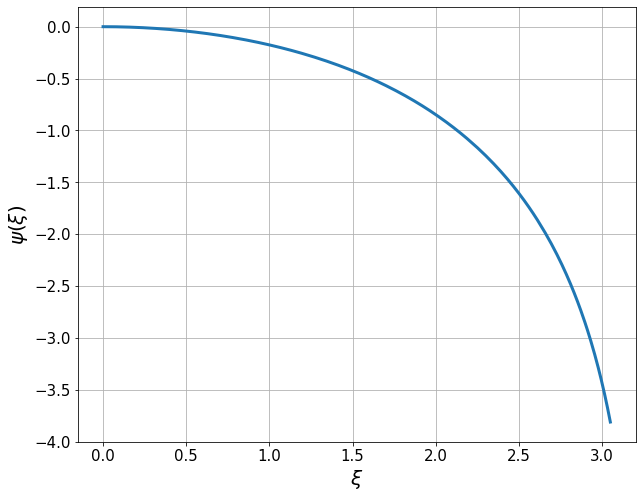

In [5]:
firsts_N = 30500

SIZE_ticks = 15
SIZE_labels = 20

fig = plt.figure(figsize=(10,8))

plt.plot(csis[:firsts_N], psis[:firsts_N], '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\psi(\xi)$', size=SIZE_labels);

In [6]:
rho_norm = np.e**psis

Text(0, 0.5, '$\\rho(\\xi)/\\rho_c$')

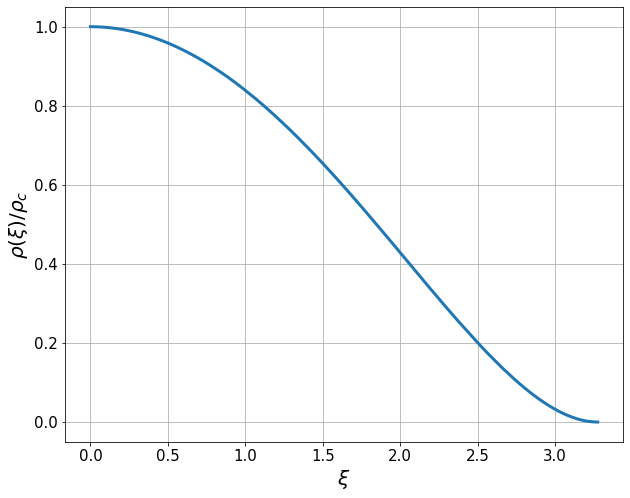

In [7]:
SIZE_ticks = 15
SIZE_labels = 20

fig = plt.figure(figsize=(10,8))

plt.plot(csis, rho_norm, '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\rho(\xi)/\rho_c$', size=SIZE_labels)

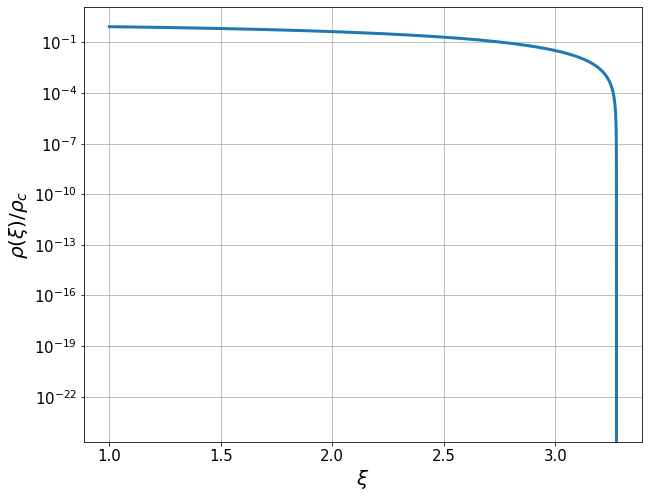

In [8]:
firsts_N = 10000
SIZE_ticks = 15
SIZE_labels = 20

fig = plt.figure(figsize=(10,8))

plt.plot(csis[firsts_N:], rho_norm[firsts_N:], '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\rho(\xi)/\rho_c$', size=SIZE_labels)
#plt.xscale("log")
plt.yscale("log")